# Importing all the necessary libareries to load and eda on the data set

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

#librariers for the Sentiment analysing and finding the sentiment score which will help in EDA

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
import string
import nltk
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-dataset/train_news.csv


# Loading the dataset

In [24]:
df=pd.read_csv('/kaggle/input/fake-news-dataset/train_news.csv')

In [25]:
df

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


# #Data Pre- Processing

In [26]:
df.describe()

,Unnamed: 0,id,label
count,20800.000000,20800.000000,20800.000000
mean,10399.500000,10399.500000,0.500625
std,6004.587135,6004.587135,0.500012
min,0.000000,0.000000,0.000000
25%,5199.750000,5199.750000,0.000000
50%,10399.500000,10399.500000,1.000000
75%,15599.250000,15599.250000,1.000000
max,20799.000000,20799.000000,1.000000


In [27]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [30]:
df.tail()

,Unnamed: 0,id,headline,written_by,news,label
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0
20799,20799,15660,Emory University to Pay for ’100 Percent’ of U...,Tom Ciccotta,"Emory University in Atlanta, Georgia, has anno...",0


# Data Cleaning

In [29]:
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [31]:
df.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

In [32]:
df=df.drop(['Unnamed: 0'],axis=1)

In [33]:
df.size

104000

In [34]:
df.isnull().sum()

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [35]:
df1=df

In [36]:
df1.dropna()

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...
20794,366,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0
20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


# EDA 

In [85]:
df1.written_by.unique().value_count

AttributeError: 'numpy.ndarray' object has no attribute 'value_count'

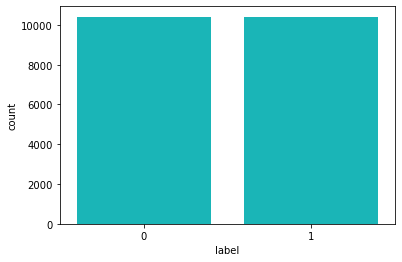

 real-0 and fake-1 
 1    10413
0    10387
Name: label, dtype: int64


In [37]:
sns.countplot('label', data=df1, color="darkturquoise")
plt.show()
print(' real-0 and fake-1','\n', df1.label.value_counts())


# it shows the data has approximatley even out in fake and real email

In [38]:
print ('fake ratio = ', round(len(df1[df1['label']==1]) / len(df1.label),2)*100,'%')
print ('real ratio  = ', round(len(df1[df1['label']==0]) / len(df1.label),2)*100,'%')

fake ratio =  50.0 %
real ratio  =  50.0 %


In [39]:
df.dtypes

id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

* “id”:  Unique id of each news article
* “headline”:  It is the title of the news.
* “news”:  It contains the full text of the news article
* “written_by”:  It represents the author of the news article
* “label”:  It tells whether the news is fake (1) or not fake (0).

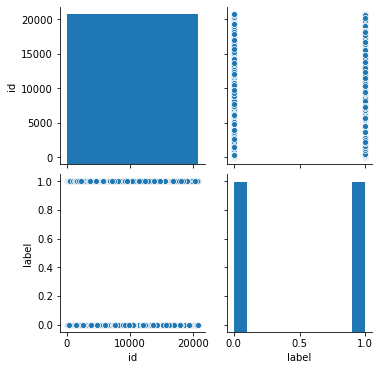

In [40]:
sns.pairplot(df)

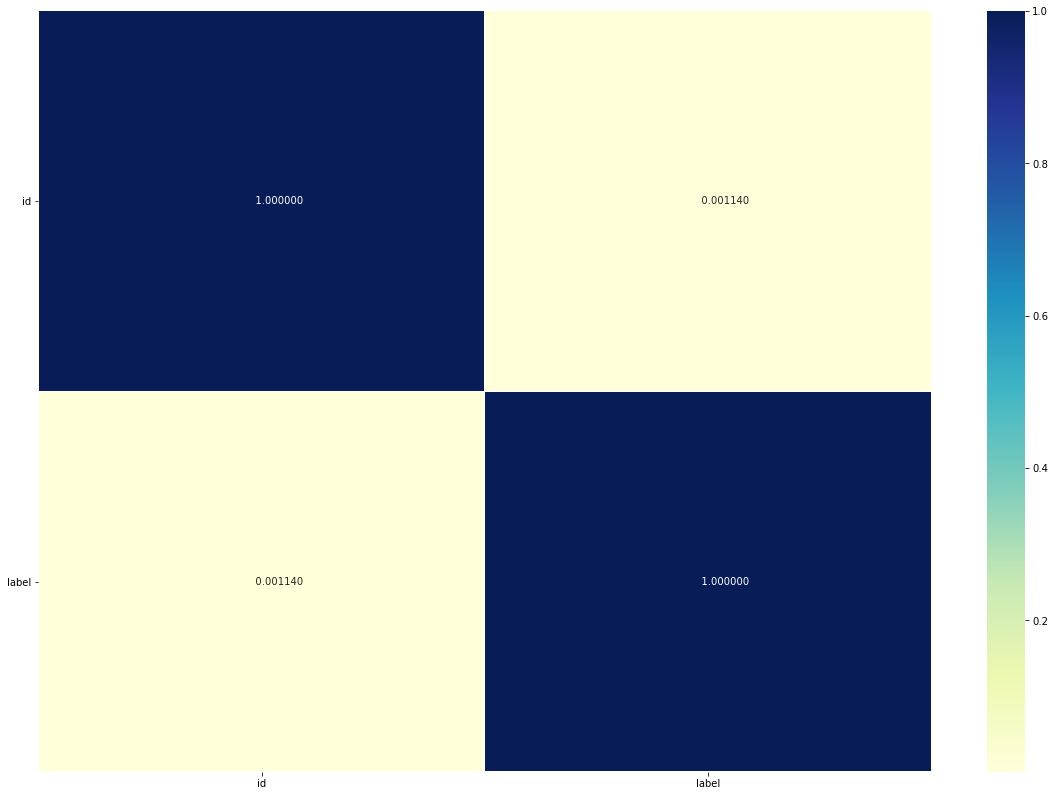

In [41]:
plt.figure(figsize=(20,14))
sns.heatmap(df1.corr(),linewidths=.1,fmt="19f",cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [42]:
all_reviews = df1['news']

# **#Data Featuring**

In [43]:
df1.dtypes

id             int64
headline      object
written_by    object
news          object
label          int64
dtype: object

**# We are creating the news into the string form and clear the spaces and repeating charachters and it is doing by  first converting  the data in lower_case
**# And then converting the lower case data into cleanedtest by remove stopwards and punctuations****

In [44]:
df1['lower_case']=df1['news'].apply(lambda x:(str(x).lower()))
df1['lower_case']=(df1['lower_case'])

In [45]:
df1.news[1]

'HOUSTON  —   Venezuela had a plan. It was a tactical approach, designed specifically to take Lionel Messi and the other dangerous Argentine attackers out of the game by applying forward pressure and forcing Argentina to make long, hopeful passes. And it worked for about seven minutes. But in the eighth minute, Messi conjured the kind of technical genius that compels most observers to call him the best soccer player in the world, artfully lifting a perfect pass about 15 yards in to Gonzalo Higuaín. With one striking touch, Higuaín converted it into a goal, the first in Argentina’s   victory on Saturday in a Copa América Centenario quarterfinal. In that decisive moment, like so many others experienced by opponents hoping to stop Messi, all of Venezuela’s carefully conceived defensive tactics were laid to waste. “They have that stroke of genius that changes all your schemes,” Venezuela Coach Rafael Dudamel said. “They had an incredible pass from Messi, and they scored. ” Messi has freque

In [46]:
df1

,id,headline,written_by,news,label,lower_case
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,"washington — in sonny perdue’s telling, geo..."
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,houston — venezuela had a plan. it was a ta...
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,"sunday on abc’s “this week,” while discussing ..."
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"augusta, me. — the beleaguered republican g..."
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,finian cunningham has written extensively on...
...,...,...,...,...,...,...
20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1,"no, you'll be a dog licking of the vomit of yo..."
20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,"by rixon stewart on november 5, 2016 rixon ste..."
20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1,posted by eddie you know the dakota access pip...
20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0,"it’s officially summer, and the society boutiq..."


In [47]:
df1['cleanedtest'] = df1['lower_case'].str.replace(r'[^\w\d\s]', '')


# Replace whitespace between terms with a single space
df1['cleanedtest'] = df1['cleanedtest'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df1['cleanedtest'] = df1['cleanedtest'].str.replace(r'^\s+|\s+?$!@#$%^&*_-+=:;"''"', '')

In [48]:
stop_words = set(stopwords.words('english'))

In [49]:
df1['cleanedtest'] = df1['cleanedtest'].apply(lambda x: ' '.join(i for i in x.split() if i not in stop_words))

In [50]:
df1.cleanedtest

0        washington sonny perdues telling georgians gro...
1        houston venezuela plan tactical approach desig...
2        sunday abcs week discussing republican plan re...
3        augusta beleaguered republican governor maine ...
4        finian cunningham written extensively internat...
                               ...                        
20795            youll dog licking vomit chinese overlords
20796    rixon stewart november 5 2016 rixon stewart no...
20797    posted eddie know dakota access pipeline prote...
20798    officially summer society boutique society mem...
20799    emory university atlanta georgia announced fun...
Name: cleanedtest, Length: 20800, dtype: object

**# we create length data of cleaned test and original test**
**these data can be used to compare with the output for fake and real in comaprison of lenth of before and after**

In [51]:
df1['clean_length']=df1.cleanedtest.str.len()

In [52]:
df1['length']=df1.news.str.len()

In [53]:
df1

,id,headline,written_by,news,label,lower_case,cleanedtest,clean_length,length
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,"washington — in sonny perdue’s telling, geo...",washington sonny perdues telling georgians gro...,5464,7936.0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,houston — venezuela had a plan. it was a ta...,houston venezuela plan tactical approach desig...,4161,6112.0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,"sunday on abc’s “this week,” while discussing ...",sunday abcs week discussing republican plan re...,270,425.0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"augusta, me. — the beleaguered republican g...",augusta beleaguered republican governor maine ...,4446,6516.0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,finian cunningham has written extensively on...,finian cunningham written extensively internat...,6685,9164.0
...,...,...,...,...,...,...,...,...,...
20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1,"no, you'll be a dog licking of the vomit of yo...",youll dog licking vomit chinese overlords,41,69.0
20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,"by rixon stewart on november 5, 2016 rixon ste...",rixon stewart november 5 2016 rixon stewart no...,4459,6621.0
20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1,posted by eddie you know the dakota access pip...,posted eddie know dakota access pipeline prote...,2545,3433.0
20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0,"it’s officially summer, and the society boutiq...",officially summer society boutique society mem...,1734,2334.0


In [54]:
# Total length removal
print ('Origian Length', df1.length.sum())
print ('Clean Length', df1.clean_length.sum())

Origian Length 94518924.0
Clean Length 65582537


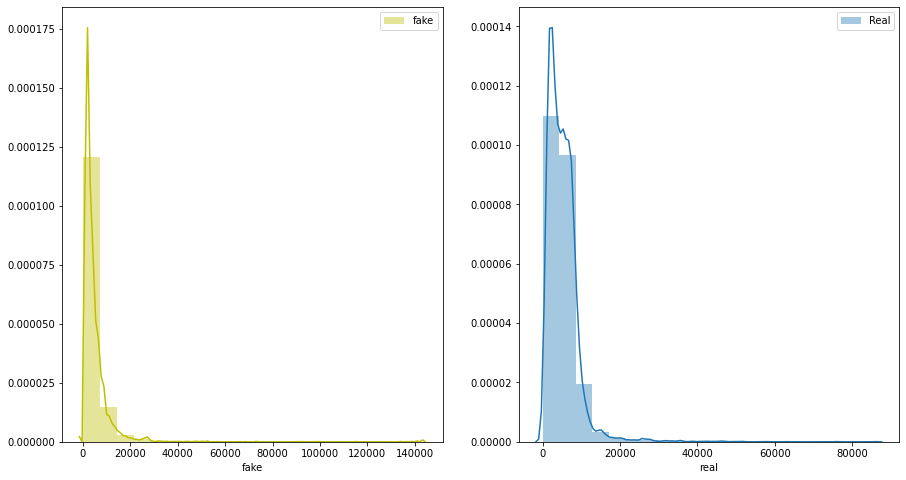

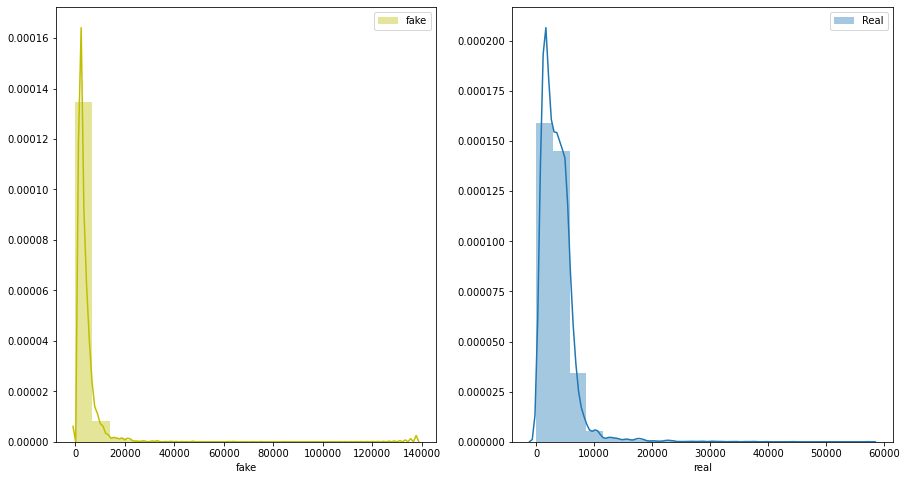

In [55]:
z=['length','clean_length']
for i in z:
    f,ax = plt.subplots(1,2,figsize = (15,8))

    sns.distplot(df1[df1['label']==1][i],bins=20,ax=ax[0],label='fake',color='y')

    ax[0].set_xlabel('fake')
    ax[0].legend()

    sns.distplot(df1[df1['label']==0][i],bins=20,ax=ax[1],label='Real')
    ax[1].set_xlabel('real')
    ax[1].legend()
    
    plt.show()

from above graph it ccan be interpreted  the fake news generally have less length than the originally one ,In other words it can be conclude they may lack in deep fact knowledge and other important poins

In [56]:
df1['compound']=df['cleanedtest'].apply(lambda x: analyser.polarity_scores(x)['compound'])

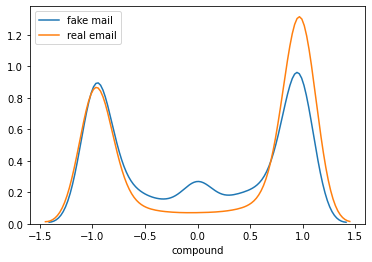

In [57]:
for x in [1,0]:
    subset = df1[df1['label'] == x]
    
    # Draw the density plot
    if x == 1:
        label = "fake mail"
    else:
        label = "real email"
    sns.distplot(subset['compound'], hist = False, label = label)

**As from above graph it is shown in above graph that it quite hard to differentiate when the fake news is  in Negative sense as it shows the same trend in  real news ,although we can differentiate when the news is very positive or almost neutral****.**

In [58]:
df1.head(5)

,id,headline,written_by,news,label,lower_case,cleanedtest,clean_length,length,compound
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,"washington — in sonny perdue’s telling, geo...",washington sonny perdues telling georgians gro...,5464,7936.0,0.9890
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,houston — venezuela had a plan. it was a ta...,houston venezuela plan tactical approach desig...,4161,6112.0,0.9993
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,"sunday on abc’s “this week,” while discussing ...",sunday abcs week discussing republican plan re...,270,425.0,-0.2732
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"augusta, me. — the beleaguered republican g...",augusta beleaguered republican governor maine ...,4446,6516.0,-0.8777
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,finian cunningham has written extensively on...,finian cunningham written extensively internat...,6685,9164.0,-0.9927


In [59]:
zz = df1['compound']
SENTI=[]
sentim=[]
for i in  zz:
    if(i<=1 and i>=0.7):
        sentim.append('very positive')
        SENTI.append(5)
    elif(i<=0.7 and i>=0.2):
        sentim.append('positive')
        SENTI.append(4)
    elif(i<=-0.7 and i>=-1):
        sentim.append('very Negative')
        SENTI.append(1)
    elif(i<=-0.2 and i>=-0.7):
        sentim.append('Negative')
        SENTI.append(2)
    else:
        sentim.append('neutral')
        SENTI.append(3)

In [60]:
df1['SENTIMENT_VALUE']=SENTI
df1['SENTIMENT']=sentim

In [61]:
df1.head(5)

,id,headline,written_by,news,label,lower_case,cleanedtest,clean_length,length,compound,SENTIMENT_VALUE,SENTIMENT
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,"washington — in sonny perdue’s telling, geo...",washington sonny perdues telling georgians gro...,5464,7936.0,0.9890,5,very positive
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,houston — venezuela had a plan. it was a ta...,houston venezuela plan tactical approach desig...,4161,6112.0,0.9993,5,very positive
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,"sunday on abc’s “this week,” while discussing ...",sunday abcs week discussing republican plan re...,270,425.0,-0.2732,2,Negative
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"augusta, me. — the beleaguered republican g...",augusta beleaguered republican governor maine ...,4446,6516.0,-0.8777,1,very Negative
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,finian cunningham has written extensively on...,finian cunningham written extensively internat...,6685,9164.0,-0.9927,1,very Negative


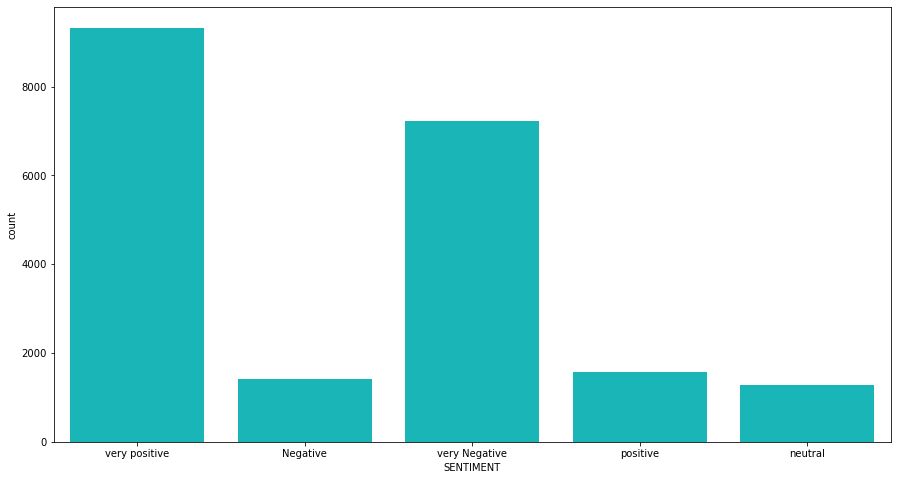

In [62]:
plt.figure(figsize=(15,8))
sns.countplot('SENTIMENT', data=df, color="darkturquoise")
plt.show()

It shows the data is either very positive or very Negative ,although the posive news is slightly more than the negative news

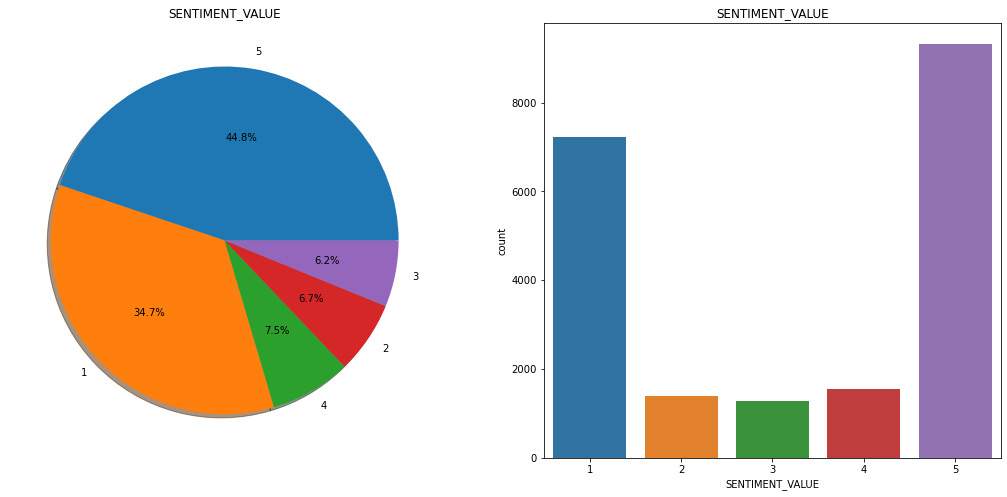

In [76]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df1['SENTIMENT_VALUE'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('SENTIMENT_VALUE')
ax[0].set_ylabel('')
sns.countplot('SENTIMENT_VALUE',data=df1,ax=ax[1])
ax[1].set_title('SENTIMENT_VALUE')
plt.show()

it shows the statstical data shows very positive news is greater thanvery negative news by approximatley by 10%.

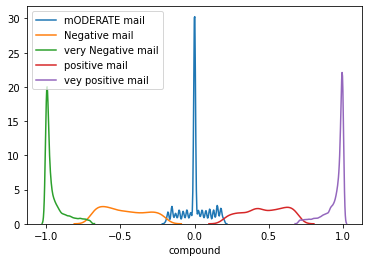

In [63]:
for x in ['neutral','Negative','very Negative','positive','very positive']:
    subset = df1[df1['SENTIMENT'] == x]
    
    # Draw the density plot
    if x == 'neutral':
        label = "mODERATE mail"
    elif x=='Negative':
        label='Negative mail'
    elif x=='very Negative':
        label='very Negative mail'
    elif x=='positive':
        label='positive mail'
    else:
        label = "vey positive mail"
    sns.distplot(subset['compound'], hist = False, label = label)

density plot showing here is that an extereme corner and at the middle of the centre the density is quite high to lie the news in that area 

In [64]:
df1['label']= df1.label.astype('float')

In [65]:
df.dtypes

id                   int64
headline            object
written_by          object
news                object
label              float64
lower_case          object
cleanedtest         object
clean_length         int64
length             float64
compound           float64
SENTIMENT_VALUE      int64
SENTIMENT           object
dtype: object

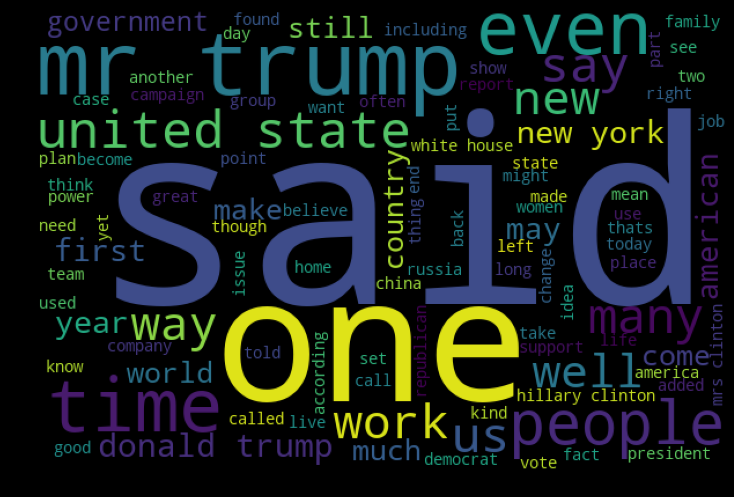

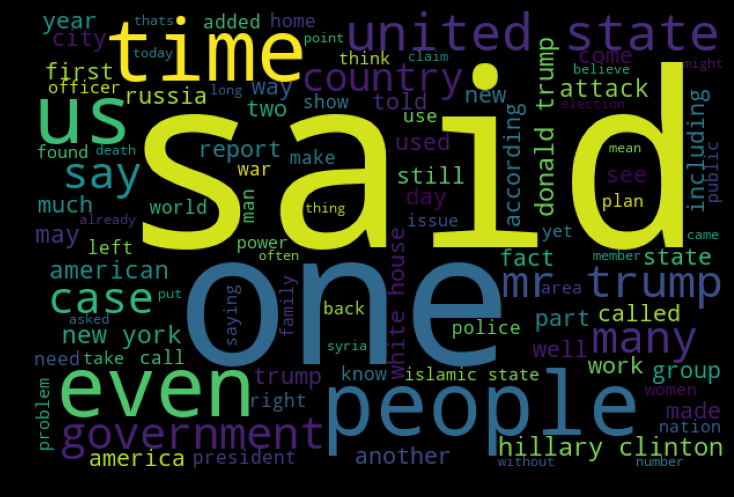

In [86]:
from wordcloud import WordCloud
from nltk.corpus import  stopwords
zz = df1['cleanedtest'][df1['SENTIMENT_VALUE']==5 ]
zz1 = df1['cleanedtest'][df1['SENTIMENT_VALUE']==4 ]
zz=zz.append(zz1)
zza = WordCloud(width=600,height=400,background_color='black',max_words=100).generate(' '.join(zz))
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(zza)
plt.axis('on')
plt.tight_layout(pad=0)
plt.show()

zz = df1['cleanedtest'][df1['SENTIMENT_VALUE']==2 ]
zz1 = df1['cleanedtest'][df1['SENTIMENT_VALUE']==1 ]
zz=zz.append(zz1)
zza = WordCloud(width=600,height=400,background_color='black',max_words=100).generate(' '.join(zz))
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(zza)
plt.axis('on')
plt.tight_layout(pad=0)
plt.show()

**> As from that word plot chart it says the news are in positive mood for the trump & government admnistration on other side henery clintopn and us police has very negative in news and other terms releated to russia and islamic state**

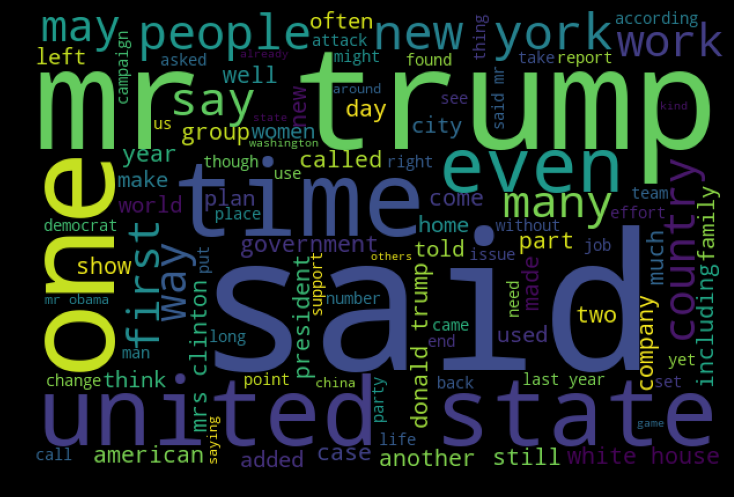

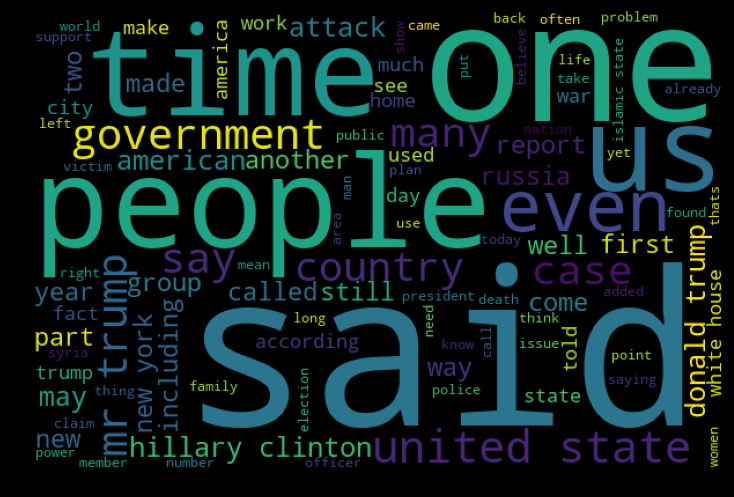

In [87]:
from wordcloud import WordCloud
from nltk.corpus import  stopwords
zz = df1['cleanedtest'][df1['label']==0 ]

zza = WordCloud(width=600,height=400,background_color='black',max_words=100).generate(' '.join(zz))
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(zza)
plt.axis('on')
plt.tight_layout(pad=0)
plt.show()

zz = df1['cleanedtest'][df1['SENTIMENT_VALUE']==1 ]
zza = WordCloud(width=600,height=400,background_color='black',max_words=100).generate(' '.join(zz))
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(zza)
plt.axis('on')
plt.tight_layout(pad=0)
plt.show()

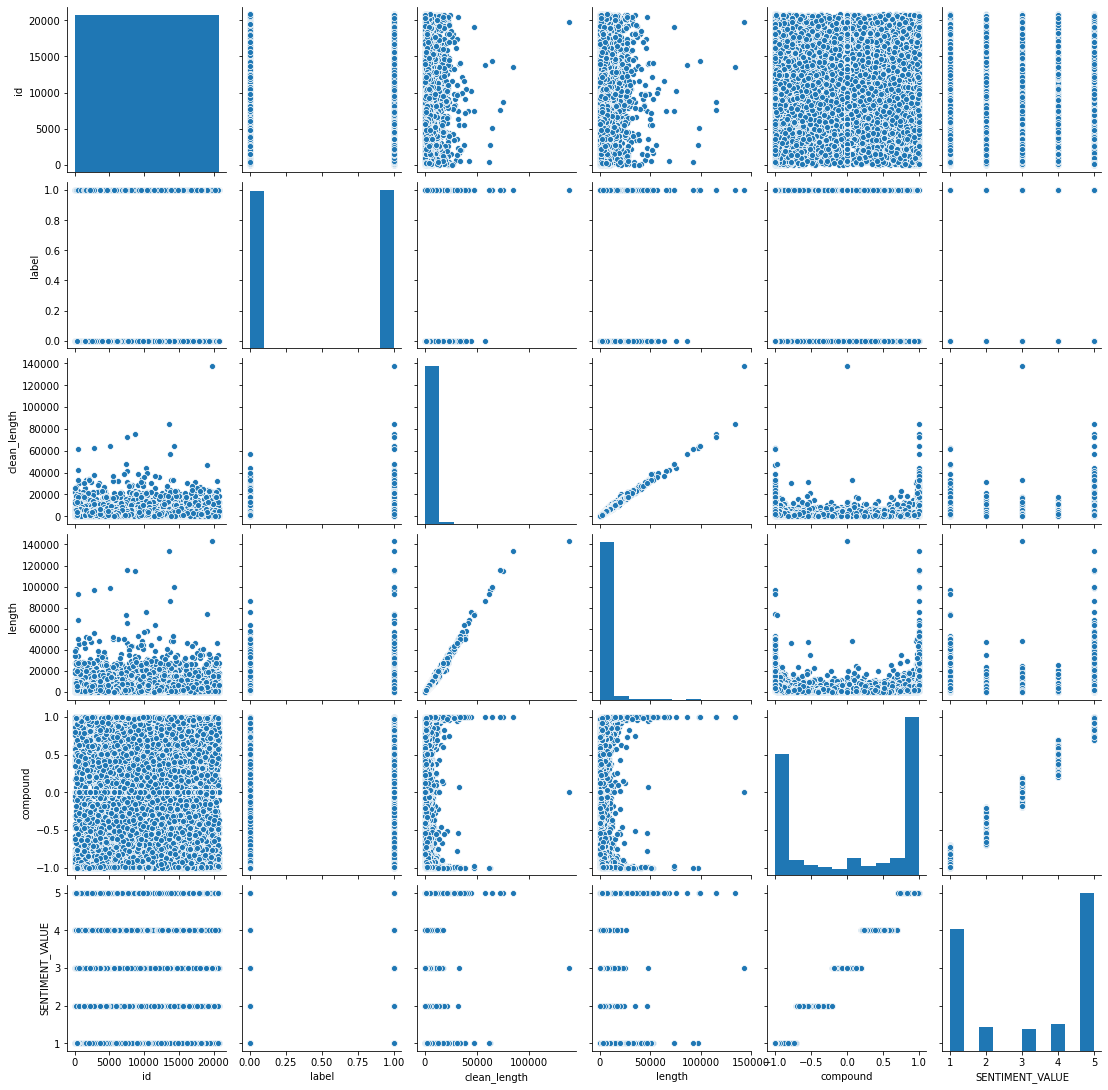

In [69]:
sns.pairplot(df1)

As the wordmap on the fake and real it is very difficult to differentiate between the fake and real

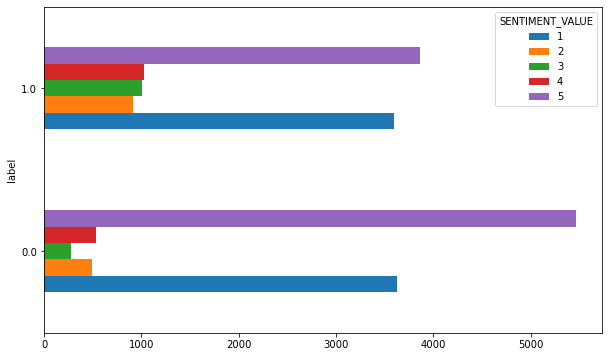

In [68]:
plt.rcParams['figure.figsize'] = (10,6)
pd.crosstab(df1.label,df1.SENTIMENT_VALUE).plot(kind='barh');

As the graph shows that the fake news is evenly proportionate in positive and negative 
while the real news is has more postive news than negative news.

# DATA MODELING

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()
dtc = DecisionTreeClassifier()
features = tf_vec.fit_transform(df1['cleanedtest'])

X = features
y = df1['label']

In [71]:
#model formation
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [77]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
svm = SVC(random_state = 1)
model = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 2)
z=[svm,knn,model,rf]

# #Model visualization

Final score SVC(random_state=1) = > 0.9627403846153846
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      2060
         1.0       0.95      0.98      0.96      2100

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



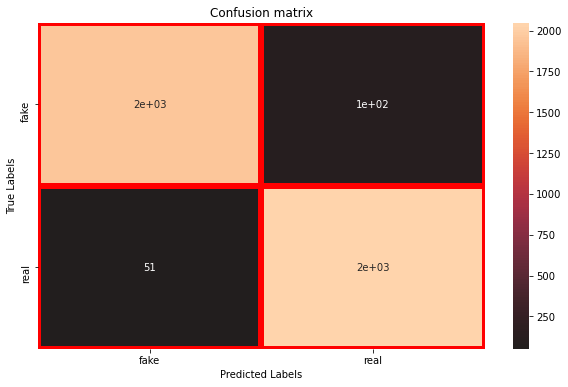

Final score KNeighborsClassifier(n_neighbors=2) = > 0.6146634615384615
              precision    recall  f1-score   support

         0.0       0.95      0.23      0.38      2060
         1.0       0.57      0.99      0.72      2100

    accuracy                           0.61      4160
   macro avg       0.76      0.61      0.55      4160
weighted avg       0.76      0.61      0.55      4160



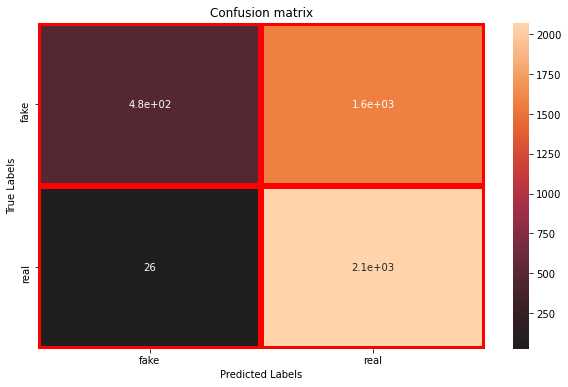

Final score LogisticRegression() = > 0.95
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      2060
         1.0       0.94      0.97      0.95      2100

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



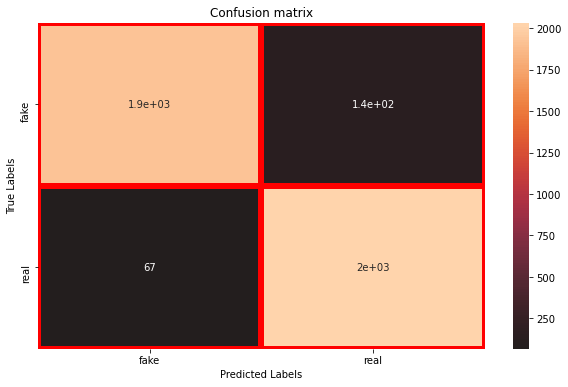

Final score RandomForestClassifier(random_state=42) = > 0.9098557692307693
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      2060
         1.0       0.94      0.88      0.91      2100

    accuracy                           0.91      4160
   macro avg       0.91      0.91      0.91      4160
weighted avg       0.91      0.91      0.91      4160



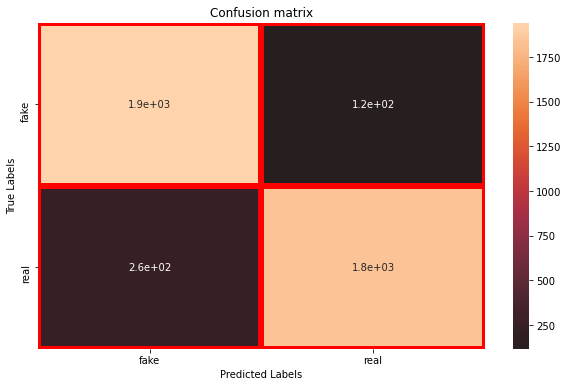

In [78]:
for i in z:
    i.fit(X_train,Y_train)
    y_pred = i.predict(x_test)
    print ('Final score {} = >' .format( i ) , accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))

    conf_mat = confusion_matrix(y_test,y_pred)

    ax=plt.subplot()

    sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

    ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

    ax.set_title('Confusion matrix')
    ax.xaxis.set_ticklabels(['fake','real'])
    ax.yaxis.set_ticklabels(['fake','real'])
    plt.show()

# # as for final say SVC is doing better job than rest of others model 
# Final score SVC(random_state=1) = > 0.9627403846153846
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      2060
         1.0       0.95      0.98      0.96      2100

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160
